## Introduction

we review the dataset for the AI Capstone Project with Deep Learning. The dataset is focused on concrete crack detection in buildings, which is important for structural health monitoring and inspection. The dataset consists of 40,000 RGB images, with 20,000 images of cracked concrete and 20,000 images with no cracks. The images will be divided into a training set (75%) and a validation set (25%). However, there are challenges associated with the dataset, such as confusion with background noise or foreign objects, variations in illumination, and irregularities in exposure and jointing. The project overview explains that the data will be pre-processed and converted into vectors for classification. Pre-trained models will be used, and the focus will be on building the model rather than the details of the actual models. The output of the final hidden layer will be used as a feature extractor, and the output layer will be modified for training. The goal is to use the network to make predictions.

In [15]:
from PIL import Image
from matplotlib.pyplot import imshow
import pandas
import matplotlib.pylab as plt
import os
import glob
import numpy as np

We will use this function in the lab to plot:


In [3]:
def show_data(data_sample, shape = (28, 28)):
    plt.imshow(data_sample[0].numpy().reshape(shape), cmap='gray')
    plt.title('y = ' + data_sample[1])

We then download the files that contain the negative images:


<h2 id="examine_files">Examine Files </h2>


In this section we are going to get a list of the negative image files, then plot them. Then for the first question your job to do something similar to the positive files. 


The path to all the images are stored in the variable  <code>directory</code>. 


In [4]:
directory="../data/cracks"

The images with out the cracks are stored in the file <b>Negative</b>


In [5]:
negative='Negative'

We can find the path to the file with all the negative images by  using the function <code>os.path.join</code>. Inputs are the variable directory as well as the variable  <code>negative</code>.


In [6]:
negative_file_path=os.path.join(directory,negative)
negative_file_path

'../data/cracks\\Negative'

<h3> Loading the File Path of Each Image </h3>


We need each the path of each image, we can find the all the file in the directory  <code>negative_file_path</code> using the function <code>os.listdir</code>, the result is a list. We print out the first three elements of the list.


In [7]:
os.listdir(negative_file_path)[0:3]

['00001.jpg', '00002.jpg', '00003.jpg']

We need the full path of the image so we join them as above. Here are a few samples  three samples:


In [8]:
[os.path.join(negative_file_path,file) for file in  os.listdir(negative_file_path)][0:3]

['../data/cracks\\Negative\\00001.jpg',
 '../data/cracks\\Negative\\00002.jpg',
 '../data/cracks\\Negative\\00003.jpg']

In some cases, we may have files of a different type, so we have to ensure it's of type <b>jpg</b>. We have to check the extension using the method <code> endswith()</code>. The method  <code>endswith()</code> returns True if the string ends with the specified suffix, otherwise, it will return False. Let's do a quick example: 


In [9]:
print("test.jpg".endswith(".jpg"))
print("test.mpg".endswith(".jpg"))

True
False


We now have all the tools to create a list with the path to each image file.  We use a List Comprehensions  to make the code more compact. We assign it to the variable <code>negative_files<code> , sort it in and display the first three elements:


In [10]:
negative_files=[os.path.join(negative_file_path,file) for file in  os.listdir(negative_file_path) if file.endswith(".jpg")]
negative_files.sort()
negative_files[0:3]

['../data/cracks\\Negative\\00001.jpg',
 '../data/cracks\\Negative\\00002.jpg',
 '../data/cracks\\Negative\\00003.jpg']



<h2 id="Question_1">Question 1</h2>


<b>Using the procedure above, load all the images with cracks paths into a list called positive files, the directory of these images is called Positive.  Make sure the list is sorted and display the first three elements of the list you will need this for the question so remember it.</b>


In [11]:
positive="Positive"
positive_file_path = os.path.join(directory,positive)

positive_files = [os.path.join(positive_file_path,file) for file in  os.listdir(positive_file_path)]
positive_files.sort()
positive_files[0:3]

['../data/cracks\\Positive\\00001.jpg',
 '../data/cracks\\Positive\\00002.jpg',
 '../data/cracks\\Positive\\00003.jpg']

<h2 id="Display">Display and Analyze Image With No Cracks</h2>


We can open an image by using the <code>Image</code> Module in the  <b>PIL</b> library, using the function open. We only require the image path; the input is the path of the image. For example we can load the first image as follows:


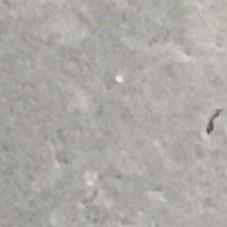

In [12]:
image1 = Image.open(negative_files[0])
# you can view the image directly 
image1

we can plot the image


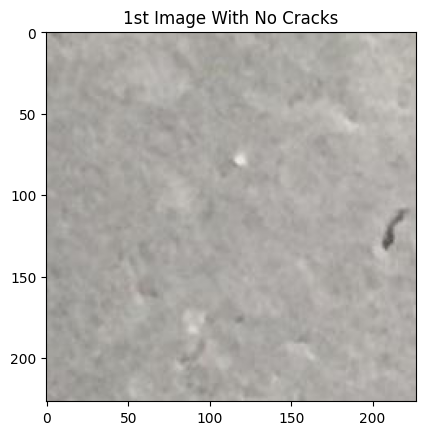

In [13]:
plt.imshow(image1)
plt.title("1st Image With No Cracks")
plt.show()

We can also plot the second image.


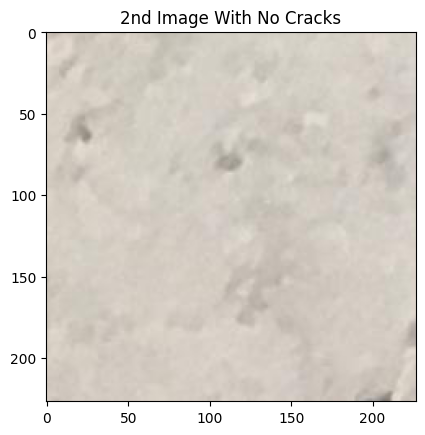

In [14]:
image2 = Image.open(negative_files[1])
plt.imshow(image2)
plt.title("2nd Image With No Cracks")
plt.show()

<h2 id="Question_2">Question 2</h2>


<b>Plot the first three images for the dataset with cracks. Don't forget. You will be asked in the quiz, so remember the image. </b>



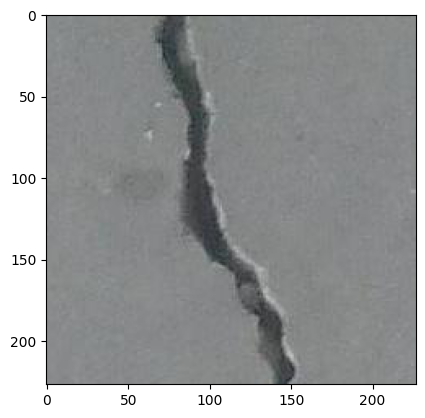

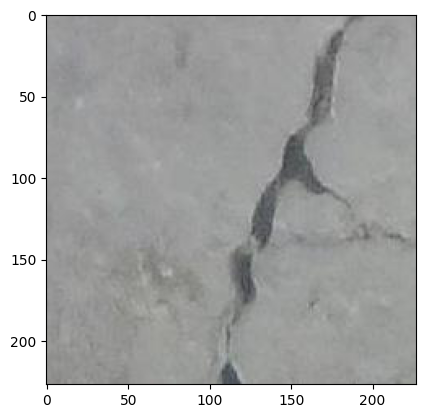

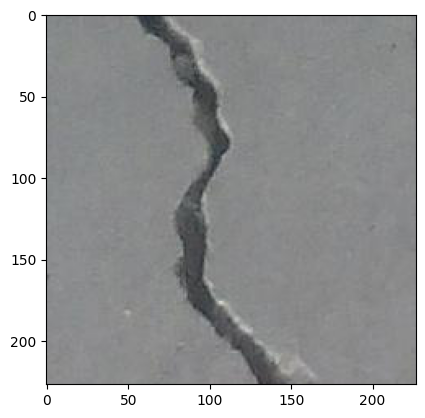

In [15]:
first_three_cracks_images = positive_files[0:3]
for image in first_three_cracks_images:
    crack_image = Image.open(image)
    plt.imshow(crack_image)
    plt.show()

Then, we will grab the first file in the directory.


In [33]:
negative_files = os.scandir('../data/cracks/Negative')
negative_files

Then, we will grab the first file in the directory.

In [34]:
file_name = next(negative_files)
file_name

<DirEntry '00001.jpg'>

Since the directory can contain elements that are not files, we will only read the element if it is a file.


In [35]:
os.path.isfile(file_name)

True

Get the image name.


In [36]:
image_name = str(file_name).split("'")[1]
image_name

'00001.jpg'

Read in the image data.


In [37]:
image_data = plt.imread('../data/cracks/Negative/{}'.format(image_name))
image_data

array([[[178, 175, 170],
        [173, 170, 165],
        [166, 163, 158],
        ...,
        [189, 186, 179],
        [189, 186, 179],
        [189, 186, 179]],

       [[176, 173, 168],
        [174, 171, 166],
        [167, 164, 159],
        ...,
        [185, 182, 175],
        [185, 182, 175],
        [185, 182, 175]],

       [[177, 174, 169],
        [176, 173, 168],
        [171, 168, 163],
        ...,
        [181, 178, 171],
        [181, 178, 171],
        [181, 178, 171]],

       ...,

       [[163, 159, 156],
        [159, 155, 152],
        [156, 152, 149],
        ...,
        [175, 171, 168],
        [174, 170, 167],
        [173, 169, 166]],

       [[165, 161, 158],
        [161, 157, 154],
        [157, 153, 150],
        ...,
        [175, 171, 168],
        [174, 170, 167],
        [173, 169, 166]],

       [[168, 164, 161],
        [163, 159, 156],
        [157, 153, 150],
        ...,
        [175, 171, 168],
        [174, 170, 167],
        [173, 169, 166]]

### **Question**: What is the dimension of a single image according to **image_data**? 


In [38]:
## You can use this cell to type your code to answer the above question
image_data.dtype
image_data[1].ndim
image_data.shape

(227, 227, 3)

Let's view the image.


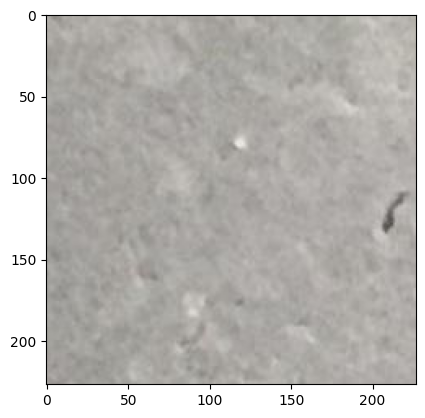

In [9]:
plt.imshow(image_data)

Now that we are familiar with the process of reading in an image data, let's loop through all the image in the *./Negative* directory and read them all in and save them in the list **negative_images**. We will also time it to see how long it takes to read in all the images.


In [14]:
%%time

negative_images = []
for file_name in negative_files:
    if os.path.isfile(file_name):
        image_name = str(file_name).split("'")[1]
        image_data = plt.imread('../data/cracks/Negative/{}'.format(image_name))
        negative_images.append(image_data)
    
negative_images = np.array(negative_images)

NameError: name 'np' is not defined

Oops! The **KERNEL DIED** due to an out-of-memory error. Since the kernel died, you may have to run the above cell to load the libraries and packages again.

Loading images into memory is definitely not the right approach when working with images as you can hit your limit on memory and other resources fairly quickly. Therefore, let's repeat the previous process but let's save the paths to the images in a variable instead of loading and saving the images themselves.


So instead of using **os.scandir**, we will use **os.listdir**.


In [16]:
negative_images = os.listdir('../data/cracks/Negative')
negative_images

['00001.jpg',
 '00002.jpg',
 '00003.jpg',
 '00004.jpg',
 '00005.jpg',
 '00006.jpg',
 '00007.jpg',
 '00008.jpg',
 '00009.jpg',
 '00010.jpg',
 '00011.jpg',
 '00012.jpg',
 '00013.jpg',
 '00014.jpg',
 '00015.jpg',
 '00016.jpg',
 '00017.jpg',
 '00018.jpg',
 '00019.jpg',
 '00020.jpg',
 '00021.jpg',
 '00022.jpg',
 '00023.jpg',
 '00024.jpg',
 '00025.jpg',
 '00026.jpg',
 '00027.jpg',
 '00028.jpg',
 '00029.jpg',
 '00030.jpg',
 '00031.jpg',
 '00032.jpg',
 '00033.jpg',
 '00034.jpg',
 '00035.jpg',
 '00036.jpg',
 '00037.jpg',
 '00038.jpg',
 '00039.jpg',
 '00040.jpg',
 '00041.jpg',
 '00042.jpg',
 '00043.jpg',
 '00044.jpg',
 '00045.jpg',
 '00046.jpg',
 '00047.jpg',
 '00048.jpg',
 '00049.jpg',
 '00050.jpg',
 '00051.jpg',
 '00052.jpg',
 '00053.jpg',
 '00054.jpg',
 '00055.jpg',
 '00056.jpg',
 '00057.jpg',
 '00058.jpg',
 '00059.jpg',
 '00060.jpg',
 '00061.jpg',
 '00062.jpg',
 '00063.jpg',
 '00064.jpg',
 '00065.jpg',
 '00066.jpg',
 '00067.jpg',
 '00068.jpg',
 '00069.jpg',
 '00070.jpg',
 '00071.jpg',
 '0007

Notice how the images are not sorted, so let's call the <code>sort</code> method to sort the images.


In [17]:
negative_images.sort()
negative_images

['00001.jpg',
 '00002.jpg',
 '00003.jpg',
 '00004.jpg',
 '00005.jpg',
 '00006.jpg',
 '00007.jpg',
 '00008.jpg',
 '00009.jpg',
 '00010.jpg',
 '00011.jpg',
 '00012.jpg',
 '00013.jpg',
 '00014.jpg',
 '00015.jpg',
 '00016.jpg',
 '00017.jpg',
 '00018.jpg',
 '00019.jpg',
 '00020.jpg',
 '00021.jpg',
 '00022.jpg',
 '00023.jpg',
 '00024.jpg',
 '00025.jpg',
 '00026.jpg',
 '00027.jpg',
 '00028.jpg',
 '00029.jpg',
 '00030.jpg',
 '00031.jpg',
 '00032.jpg',
 '00033.jpg',
 '00034.jpg',
 '00035.jpg',
 '00036.jpg',
 '00037.jpg',
 '00038.jpg',
 '00039.jpg',
 '00040.jpg',
 '00041.jpg',
 '00042.jpg',
 '00043.jpg',
 '00044.jpg',
 '00045.jpg',
 '00046.jpg',
 '00047.jpg',
 '00048.jpg',
 '00049.jpg',
 '00050.jpg',
 '00051.jpg',
 '00052.jpg',
 '00053.jpg',
 '00054.jpg',
 '00055.jpg',
 '00056.jpg',
 '00057.jpg',
 '00058.jpg',
 '00059.jpg',
 '00060.jpg',
 '00061.jpg',
 '00062.jpg',
 '00063.jpg',
 '00064.jpg',
 '00065.jpg',
 '00066.jpg',
 '00067.jpg',
 '00068.jpg',
 '00069.jpg',
 '00070.jpg',
 '00071.jpg',
 '0007

Before we can show an image, we need to open it, which we can do using the **Image** module in the **PIL** library. So to open the first image, we run the following:


In [19]:
image_data = Image.open('../data/cracks/Negative/{}'.format(negative_images[0]))

Then to view the image, you can simply run:


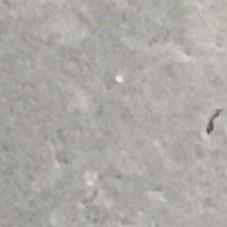

In [20]:
image_data

or use the <code>imshow</code> method as follows:


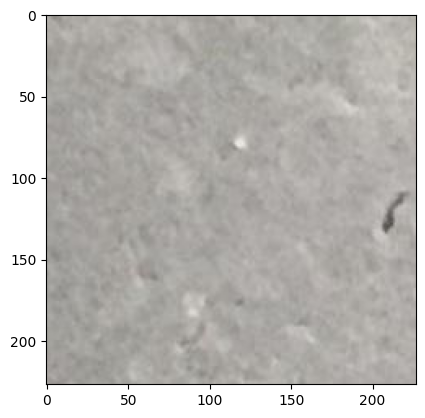

In [21]:
plt.imshow(image_data)

Let's loop through all the images in the <code>./Negative</code> directory and add save their paths.


In [22]:
negative_images_dir = ['../data/cracks/Negative/{}'.format(image) for image in negative_images]
negative_images_dir

['../data/cracks/Negative/00001.jpg',
 '../data/cracks/Negative/00002.jpg',
 '../data/cracks/Negative/00003.jpg',
 '../data/cracks/Negative/00004.jpg',
 '../data/cracks/Negative/00005.jpg',
 '../data/cracks/Negative/00006.jpg',
 '../data/cracks/Negative/00007.jpg',
 '../data/cracks/Negative/00008.jpg',
 '../data/cracks/Negative/00009.jpg',
 '../data/cracks/Negative/00010.jpg',
 '../data/cracks/Negative/00011.jpg',
 '../data/cracks/Negative/00012.jpg',
 '../data/cracks/Negative/00013.jpg',
 '../data/cracks/Negative/00014.jpg',
 '../data/cracks/Negative/00015.jpg',
 '../data/cracks/Negative/00016.jpg',
 '../data/cracks/Negative/00017.jpg',
 '../data/cracks/Negative/00018.jpg',
 '../data/cracks/Negative/00019.jpg',
 '../data/cracks/Negative/00020.jpg',
 '../data/cracks/Negative/00021.jpg',
 '../data/cracks/Negative/00022.jpg',
 '../data/cracks/Negative/00023.jpg',
 '../data/cracks/Negative/00024.jpg',
 '../data/cracks/Negative/00025.jpg',
 '../data/cracks/Negative/00026.jpg',
 '../data/cr

Let's check how many images with no cracks exist in the dataset.


In [23]:
len(negative_images_dir)

20000

### Question: Show the next four images.


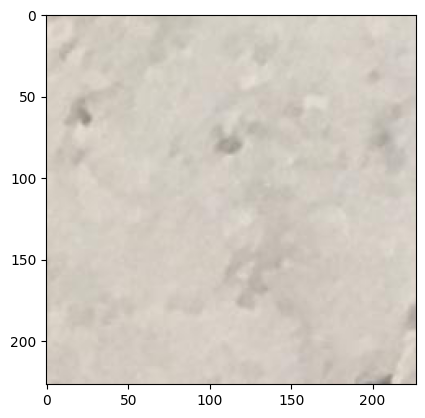

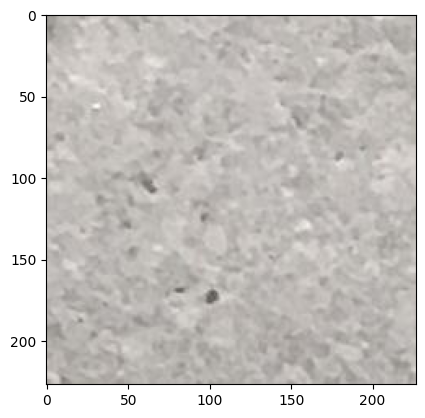

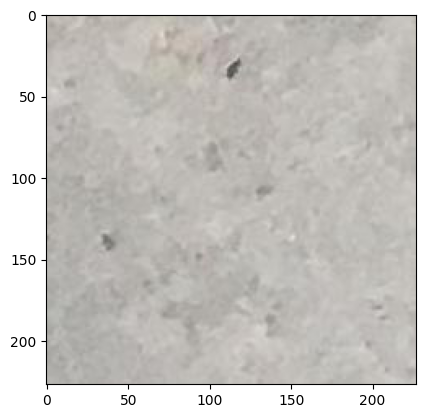

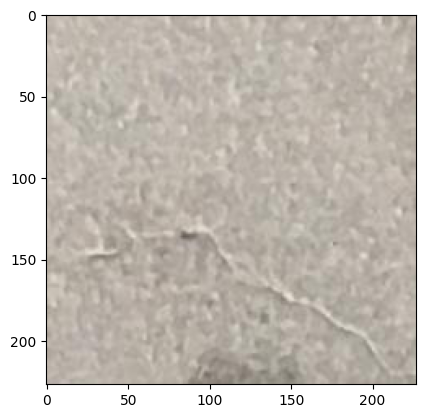

In [26]:
## You can use this cell to type your code to answer the above question
for image in negative_images_dir[1:5]:
    image_to_show = Image.open(image)
    plt.imshow(image_to_show)
    plt.show()

**Your turn**: Save the paths to all the images in the *./Positive* directory in a list called **positive_images_dir**. Make sure to sort the paths.


In [28]:
## Type your answer here
positive_files = os.listdir("../data/cracks/Positive")
positive_images_dir = ['../data/cracks/Positive/{}'.format(image) for image in negative_images]
positive_images_dir

['../data/cracks/Positive/00001.jpg',
 '../data/cracks/Positive/00002.jpg',
 '../data/cracks/Positive/00003.jpg',
 '../data/cracks/Positive/00004.jpg',
 '../data/cracks/Positive/00005.jpg',
 '../data/cracks/Positive/00006.jpg',
 '../data/cracks/Positive/00007.jpg',
 '../data/cracks/Positive/00008.jpg',
 '../data/cracks/Positive/00009.jpg',
 '../data/cracks/Positive/00010.jpg',
 '../data/cracks/Positive/00011.jpg',
 '../data/cracks/Positive/00012.jpg',
 '../data/cracks/Positive/00013.jpg',
 '../data/cracks/Positive/00014.jpg',
 '../data/cracks/Positive/00015.jpg',
 '../data/cracks/Positive/00016.jpg',
 '../data/cracks/Positive/00017.jpg',
 '../data/cracks/Positive/00018.jpg',
 '../data/cracks/Positive/00019.jpg',
 '../data/cracks/Positive/00020.jpg',
 '../data/cracks/Positive/00021.jpg',
 '../data/cracks/Positive/00022.jpg',
 '../data/cracks/Positive/00023.jpg',
 '../data/cracks/Positive/00024.jpg',
 '../data/cracks/Positive/00025.jpg',
 '../data/cracks/Positive/00026.jpg',
 '../data/cr

### Question: How many images of cracked concrete exist in the *./Positive* directory?


In [29]:
## You can use this cell to type your code to answer the above question
len(positive_images_dir)

20000

### Question: Show the first four images with cracked concrete.


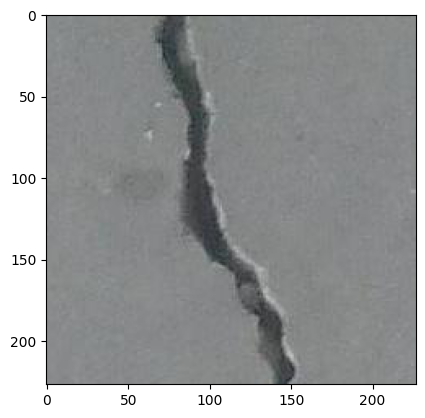

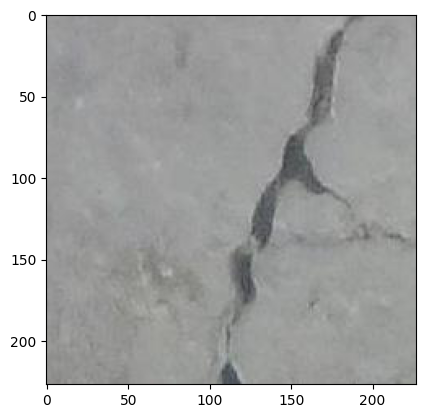

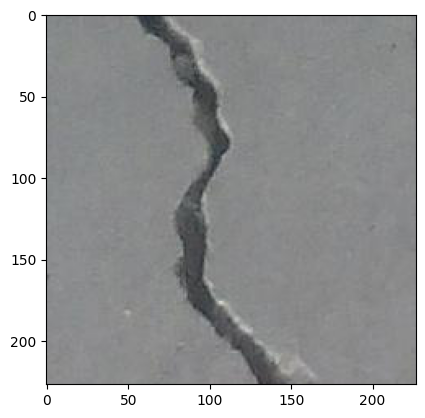

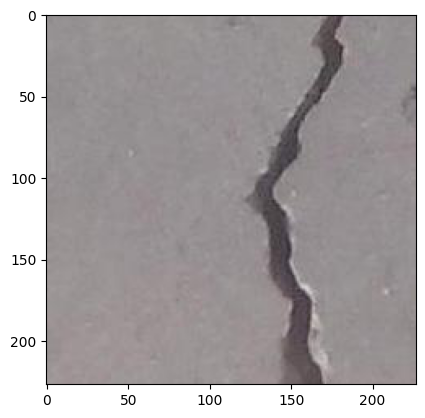

In [31]:
## You can use this cell to type your code to answer the above question
for image in positive_images_dir[:4]:
    image_to_show = Image.open(image)
    plt.imshow(image_to_show)
    plt.show()